## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [5]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'
fileName = 'jet.bmp'

if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [4]:
def showHistGray(ax, image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax.set_title(title)
    ax.grid()
    ax.plot(hist)
#
def showImageGray(ax, image, title):
    ax.set_title(title)
    ax.axis('off')
    ax.imshow(image, 'gray', vmin=0, vmax=256)
#
def showCumHistPlt(ax, image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    cumHist = hist.cumsum()
    ax.plot(cumHist)
    return cumHist 
#
def showHistGrayPlt(ax, image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax.plot(hist)
#
# Returns pointer to CLAHE class. 
def createCLAHE(contrastLimit, recRows, recColumns):
    return cv2.createCLAHE(contrastLimit, (recRows, recColumns))
#

def normalize(image):
    result = np.zeros(image.shape, dtype=np.uint8)
    cv2.normalize(image, result, 0, 255, cv2.NORM_MINMAX)
    return result 
#

def show3Img(ax, image):
    imageCLAHE    = clahe.apply(image)
    imageNORM     = normalize(image) 
    imageEqualize = cv2.equalizeHist(image)

    showImageGray(ax[0], image, "Original image")
    showImageGray(ax[1], imageCLAHE, "Image CLAHE")
    showImageGray(ax[2], imageNORM, "Image NORMALIZE")
    showImageGray(ax[3], imageEqualize, "Image Equalize")
#
def showHistColor(ax, image, channel, title):
    hist = cv2.calcHist([image], [channel], None, [256], [0, 256])
    ax.set_title(title)
    ax.grid()
    ax.plot(hist)
#
def showImageColor(ax, image, title):
    ax.set_title(title)
    ax.axis('off')
    ax.imshow(image, vmin=0, vmax=256)
#

clahe = createCLAHE(5, 5, 5)

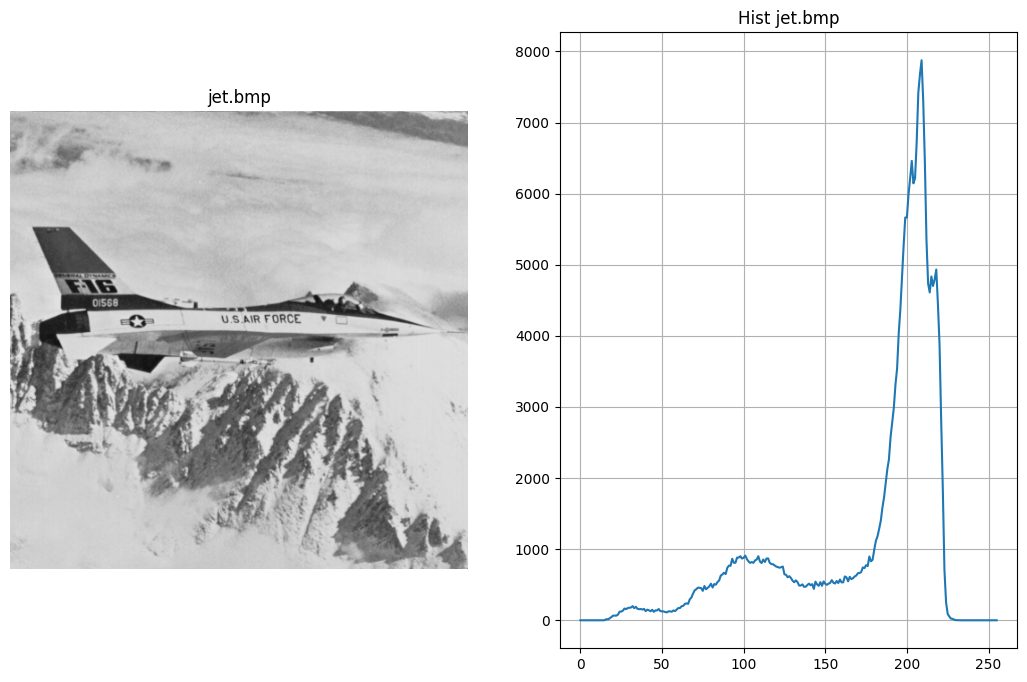

In [50]:
jetImage = cv2.imread('jet.bmp')
_, axs = plt.subplots(1, 2, figsize=(13, 8))

showImageGray(axs[0], jetImage, "jet.bmp")
showHistGray(axs[1], jetImage, "Hist jet.bmp")

In [58]:
jet = cv2.cvtColor(jetImage, cv2.COLOR_BGR2GRAY)

averageV = np.mean(jet)

darkMask = jet < averageV
brightMask = jet >= averageV

darkJet = jet[darkMask]
brightJet = jet[brightMask]


equalizeDarkJet = cv2.equalizeHist(darkJet.astype(np.uint8))
equalizeBrightJet = cv2.equalizeHist(brightJet.astype(np.uint8))

resultJet = np.copy(jet)

resultJet[darkMask] = equalizeDarkJet
resultJet[brightMask] = equalizeBrightJet

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions